<a href="https://colab.research.google.com/github/pkongla478/-build-a-speech-emotion-detection-classifier/blob/main/build_a_speech_emotion_detection_classifier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en


https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition/notebook

https://drive.google.com/file/d/1hLWxc6eoVzMjYYgKEtOVCokojF-g8ddd/view?usp=sharing

In [1]:
"/content/drive/MyDrive/KSU/SuperAI/Signal Workshop"

'/content/drive/MyDrive/KSU/SuperAI/Signal Workshop'

In [2]:
! pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [3]:
! gdown --id 1hLWxc6eoVzMjYYgKEtOVCokojF-g8ddd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1hLWxc6eoVzMjYYgKEtOVCokojF-g8ddd
From (redirected): https://drive.google.com/uc?id=1hLWxc6eoVzMjYYgKEtOVCokojF-g8ddd&confirm=t&uuid=9908208f-ac09-44a8-80ad-8f5681e6354a
To: /content/archive.zip
100% 1.04G/1.04G [00:27<00:00, 38.2MB/s]


In [4]:
! unzip "/content/archive.zip" 

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1088_TSI_ANG_XX.wav  


In [5]:
# Paths for data.
root_path = "/content/"
Ravdess = "/content/Ravdess/audio_speech_actors_01-24/"
Crema = "/content/Crema/"
Tess = "/content/Tess/"
Savee = "/content/Savee/"

In [6]:
import os
import pandas as pd

ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,/content/Ravdess/audio_speech_actors_01-24/Act...
1,fear,/content/Ravdess/audio_speech_actors_01-24/Act...
2,surprise,/content/Ravdess/audio_speech_actors_01-24/Act...
3,sad,/content/Ravdess/audio_speech_actors_01-24/Act...
4,fear,/content/Ravdess/audio_speech_actors_01-24/Act...


In [ ]:
Ravdess_df

,Emotions,Path
0,surprise,/content/Ravdess/audio_speech_actors_01-24/Act...
1,sad,/content/Ravdess/audio_speech_actors_01-24/Act...
2,disgust,/content/Ravdess/audio_speech_actors_01-24/Act...
3,neutral,/content/Ravdess/audio_speech_actors_01-24/Act...
4,fear,/content/Ravdess/audio_speech_actors_01-24/Act...
...,...,...
1435,sad,/content/Ravdess/audio_speech_actors_01-24/Act...
1436,happy,/content/Ravdess/audio_speech_actors_01-24/Act...
1437,sad,/content/Ravdess/audio_speech_actors_01-24/Act...
1438,sad,/content/Ravdess/audio_speech_actors_01-24/Act...


In [7]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,fear,/content/Crema/1020_ITS_FEA_XX.wav
1,angry,/content/Crema/1050_DFA_ANG_XX.wav
2,angry,/content/Crema/1002_IWW_ANG_XX.wav
3,neutral,/content/Crema/1087_TSI_NEU_XX.wav
4,sad,/content/Crema/1089_IEO_SAD_MD.wav


In [8]:
Crema_df

,Emotions,Path
0,fear,/content/Crema/1020_ITS_FEA_XX.wav
1,angry,/content/Crema/1050_DFA_ANG_XX.wav
2,angry,/content/Crema/1002_IWW_ANG_XX.wav
3,neutral,/content/Crema/1087_TSI_NEU_XX.wav
4,sad,/content/Crema/1089_IEO_SAD_MD.wav
...,...,...
7437,sad,/content/Crema/1067_WSI_SAD_XX.wav
7438,angry,/content/Crema/1019_IOM_ANG_XX.wav
7439,sad,/content/Crema/1058_TSI_SAD_XX.wav
7440,angry,/content/Crema/1051_IWW_ANG_XX.wav


In [9]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()



,Emotions,Path
0,angry,/content/Tess/OAF_angry/OAF_walk_angry.wav
1,angry,/content/Tess/OAF_angry/OAF_make_angry.wav
2,angry,/content/Tess/OAF_angry/OAF_book_angry.wav
3,angry,/content/Tess/OAF_angry/OAF_choice_angry.wav
4,angry,/content/Tess/OAF_angry/OAF_sub_angry.wav


In [10]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,sad,/content/Savee/JK_sa02.wav
1,neutral,/content/Savee/DC_n20.wav
2,neutral,/content/Savee/JE_n07.wav
3,surprise,/content/Savee/KL_su06.wav
4,disgust,/content/Savee/JK_d13.wav


In [11]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/content/Ravdess/audio_speech_actors_01-24/Act...
1,fear,/content/Ravdess/audio_speech_actors_01-24/Act...
2,surprise,/content/Ravdess/audio_speech_actors_01-24/Act...
3,sad,/content/Ravdess/audio_speech_actors_01-24/Act...
4,fear,/content/Ravdess/audio_speech_actors_01-24/Act...


In [12]:
data_path

,Emotions,Path
0,neutral,/content/Ravdess/audio_speech_actors_01-24/Act...
1,fear,/content/Ravdess/audio_speech_actors_01-24/Act...
2,surprise,/content/Ravdess/audio_speech_actors_01-24/Act...
3,sad,/content/Ravdess/audio_speech_actors_01-24/Act...
4,fear,/content/Ravdess/audio_speech_actors_01-24/Act...
...,...,...
475,angry,/content/Savee/DC_a11.wav
476,sad,/content/Savee/DC_sa11.wav
477,neutral,/content/Savee/JK_n02.wav
478,disgust,/content/Savee/JE_d02.wav


ValueError: ignored

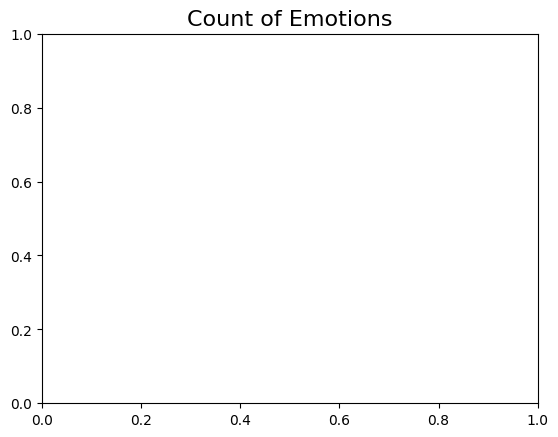

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [16]:
import librosa
import librosa.display

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

AttributeError: ignored

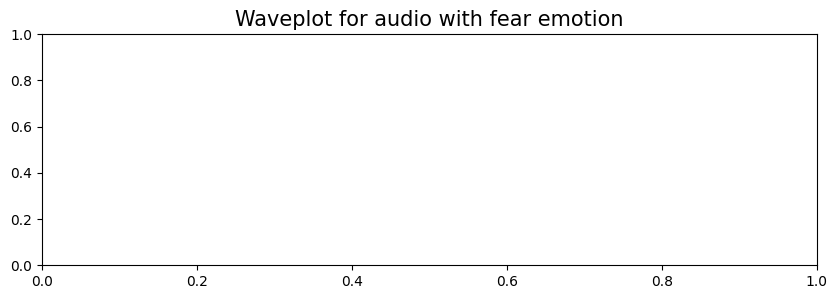

In [17]:
import numpy as np
# to play the audio files
from IPython.display import Audio

emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

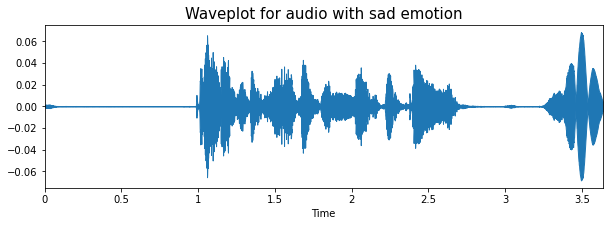

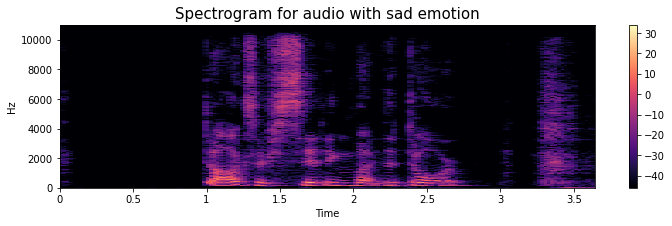

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

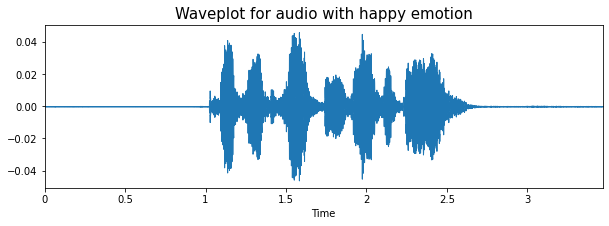

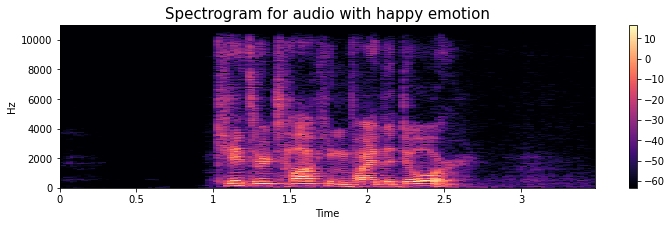

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

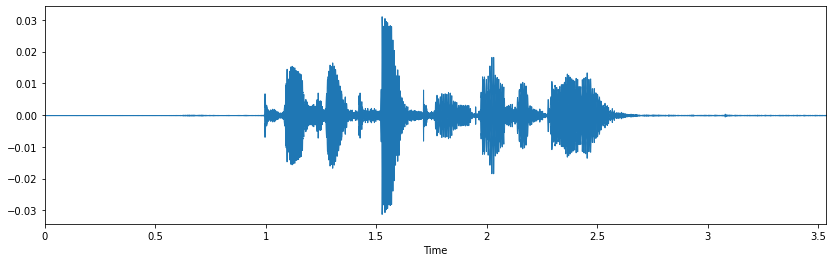

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

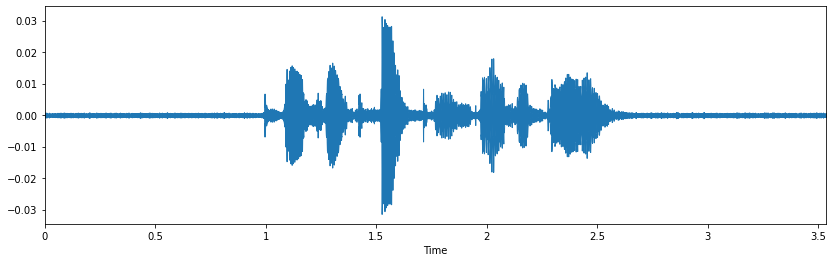

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

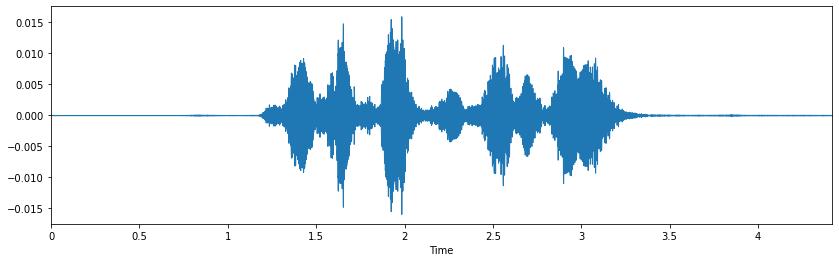

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

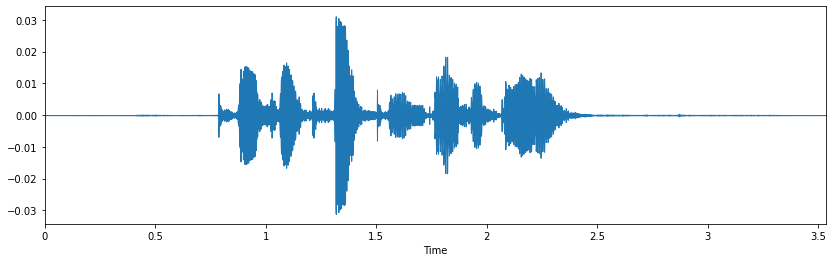

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

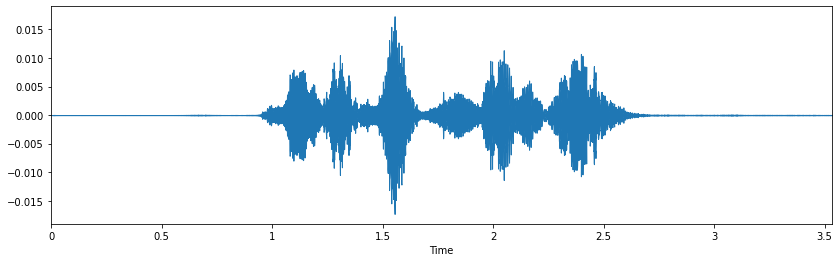

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

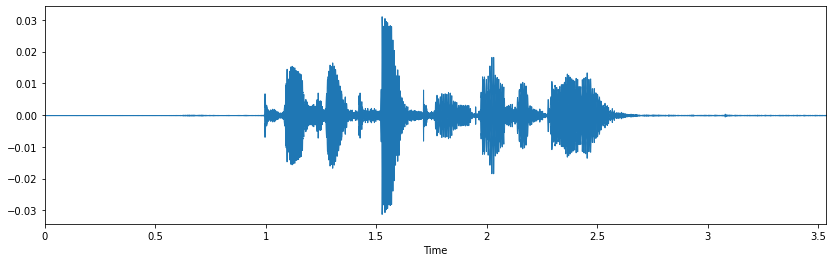

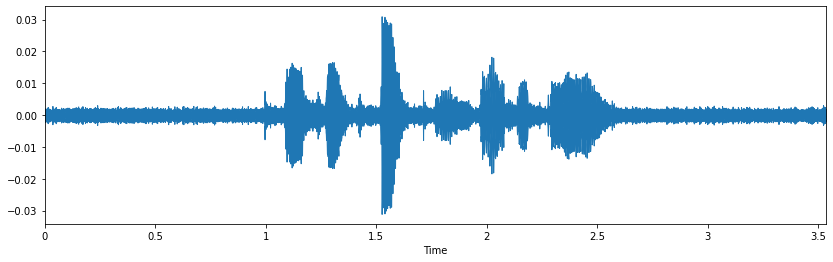

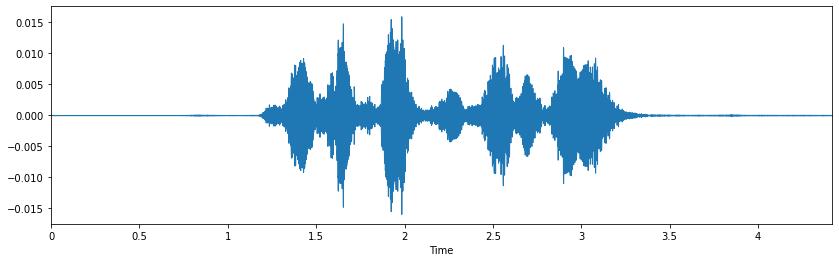

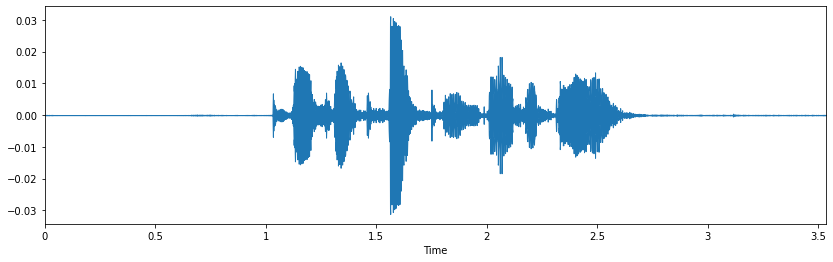

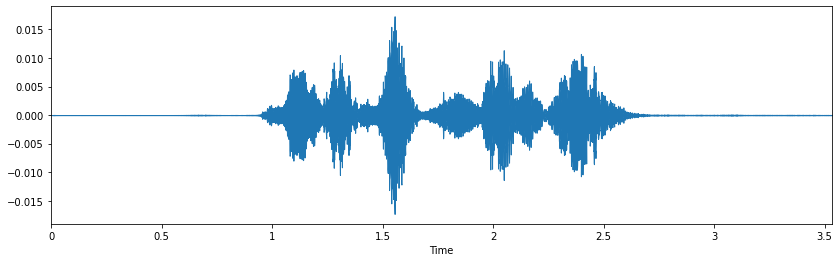

In [ ]:
data, sample_rate = librosa.load(path)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
plt.show()

x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
plt.show()

x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
plt.show()

x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
plt.show()

x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)

# Feature Extraction

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [ ]:
from tqdm import tqdm

X, Y = [], []
for path, emotion in tqdm(zip(data_path.Path, data_path.Emotions)):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

2583it [16:42,  3.20it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
12162it [1:06:57,  3.03it/s]


In [ ]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.196013,0.720881,0.700827,0.635049,0.640804,0.629311,0.607505,0.579492,0.560298,0.567683,...,0.001824,0.002737,0.003708,0.004260,0.003254,0.001714,0.000631,6.022860e-05,8.401893e-07,surprise
1,0.317971,0.761137,0.758324,0.741269,0.752127,0.771100,0.731082,0.665387,0.637486,0.602940,...,0.004318,0.005173,0.006447,0.006859,0.005514,0.004214,0.003085,2.565575e-03,2.540573e-03,surprise
2,0.144933,0.692374,0.734083,0.699151,0.613226,0.598854,0.633209,0.592484,0.550582,0.537505,...,0.000528,0.000457,0.000569,0.001150,0.000803,0.000480,0.000070,2.904830e-06,2.183323e-08,surprise
3,0.203102,0.682245,0.641634,0.595636,0.604541,0.591535,0.563979,0.576945,0.621581,0.684301,...,0.000002,0.000003,0.000006,0.000009,0.000010,0.000010,0.000003,1.605825e-07,2.343064e-09,sad
4,0.319033,0.775911,0.800638,0.776592,0.788869,0.799968,0.739016,0.667600,0.673836,0.717550,...,0.000058,0.000057,0.000061,0.000064,0.000063,0.000068,0.000060,5.269179e-05,5.597325e-05,sad


In [ ]:
Features.shape

(36486, 163)

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 [==============================] - 14s 12ms/step - loss: 1.6981 - accuracy: 0.3105 - val_loss: 1.4261 - val_accuracy: 0.4297 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 4s 10ms/step - loss: 1.4356 - accuracy: 0.4234 - val_loss: 1.2790 - val_accuracy: 0.4893 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 4s 10ms/step - loss: 1.3433 - accuracy: 0.4608 - val_loss: 1.2408 - val_accuracy: 0.5046 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 4s 10ms/step - loss: 1.2800 - accuracy: 0.4855 - val_loss: 1.2093 - val_accuracy: 0.5158 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 5s 11ms/step - loss: 1.2392 - accuracy: 0.5038 - val_loss: 1.1503 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 4s 10ms/step - loss: 1.2196 - accuracy: 0.5117 - val_loss: 1.1434 - val_accuracy: 0.5432 - lr: 0.0010
Epoch 7/50
428/428 [==============================] - 4s 10ms/s